## A GENDER BASED ANALYSIS ON HEART DISEASE USING A REAL LIFE DATA SAMPLE

#### Introduction

Heart disease is a term used to describe a constellation of conditions that can affect the heart and/or its valves, vessels, structure, electrical system, or coronary arteries. Though each disease affects the heart differently, the ultimate problem with all varieties of heart disease is that they can disrupt the vital pumping action of the heart. Heart disease is the leading cause of death globally for all genders. Below is the link to the dataset:
www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

#### Definition of terms on columns

In [ ]:
age: age of patients
sex: gender of patients
cp: chest pain type (4 values)
trestbps: resting blood pressure
chol: serum cholestoral in mg/dl
fbs: fasting blood sugar > 120 mg/dl
restecg: resting electrocardiographic results (values 0,1,2)
thalach: maximum heart rate achieved
exang: exercise induced angina
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by flourosopy
thal: 0 = normal, 1 = fixed defect, 2 = reversible defect, 3 = irreversible defect.

#### Import Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#### Import Heart Disease dataset

In [3]:
df = pd.read_csv("heart.csv")

#### A Glance of the columns in the dataset

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#### Lets find out the data types of the columns in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Lets describe the dataset

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Cleaning

### Lets see the number of null values we have

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Lets plot a bar chart to show the most common type of chest pain among both genders

In [10]:
grouped = df.groupby(['sex', 'cp']).size().unstack()


<Figure size 500x300 with 0 Axes>

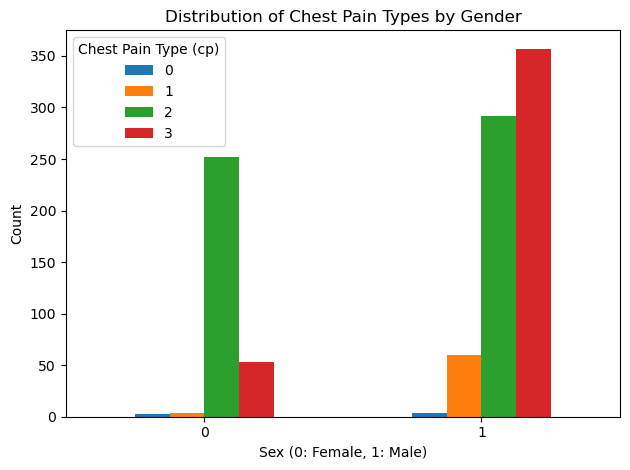

In [78]:
plt.figure(figsize=(5, 3))


grouped.plot(kind='bar', stacked=False)
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types by Gender')
plt.legend(title='Chest Pain Type (cp)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Lets see the Cholesterol level within the age range among both genders

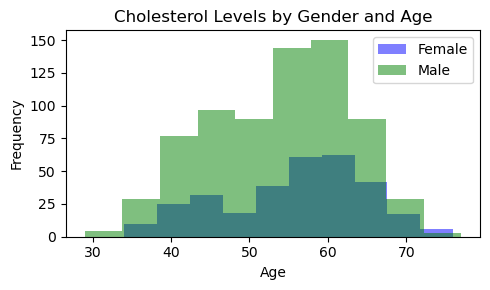

In [85]:
plt.figure(figsize=(5, 3))

plt.hist(male_data['age'], bins=10, alpha=0.5, label='Female', color='blue')
plt.hist(female_data['age'], bins=10, alpha=0.5, label='Male', color='green')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Cholesterol Levels by Gender and Age')
plt.legend()

plt.tight_layout()
plt.show()

#### Distribution of blood pressure by age

In [122]:
grouped_data = df.groupby('age')['trestbps'].mean().reset_index()


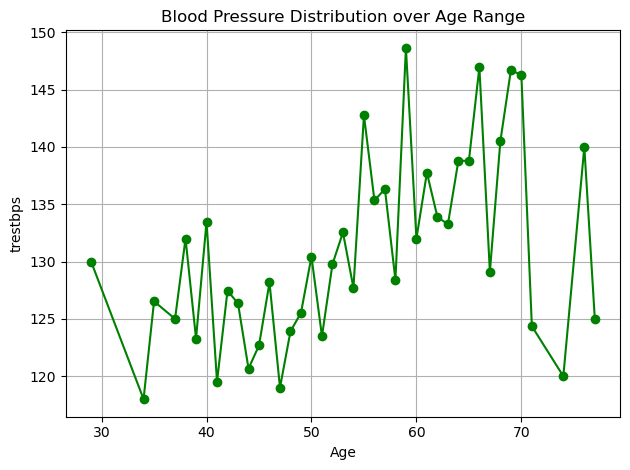

In [124]:
plt.plot(grouped_data['age'], grouped_data['trestbps'], marker='o', linestyle='-', color='green')


plt.xlabel('Age')
plt.ylabel('trestbps')
plt.title('Blood Pressure Distribution over Age Range')

plt.grid(True)
plt.tight_layout()
plt.show()

#### Lets show the number of people with Thalassemia defects according to gender

In [4]:
grouped = df.groupby(['sex', 'thal']).size().unstack()


<Figure size 300x200 with 0 Axes>

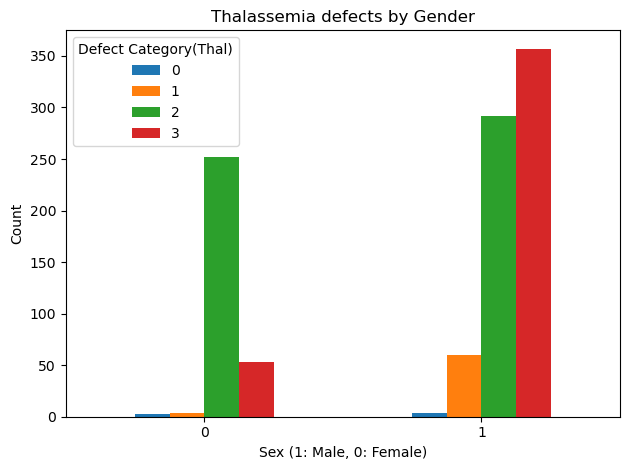

In [5]:
plt.figure(figsize=(3, 2))


grouped.plot(kind='bar', stacked=False)
plt.xlabel('Sex (1: Male, 0: Female)')
plt.ylabel('Count')
plt.title('Thalassemia defects by Gender')
plt.legend(title='Defect Category(Thal)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Heatmap

In [7]:
df = pd.DataFrame(df, columns=['cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach','exang','oldpeak','ca','thal','target'])
correlation_matrix = df.corr()

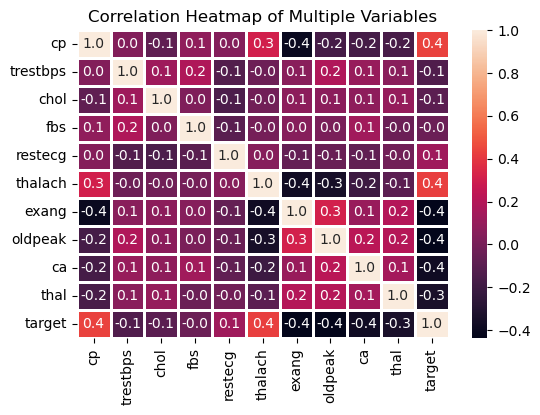

In [8]:
plt.figure(figsize=(6, 4))
sn.heatmap(correlation_matrix, linewidths=1, linecolor='white', fmt='.1f',annot=True)
plt.title('Correlation Heatmap of Multiple Variables')
plt.show()
         

#### Conclusion

1.Less than 1% of the patients have normal blood pressure, whereas majority are likely going to have stage 1 hypertension before the age of 58.
2.More male patients are likely going to have heart attack and stroke due to high cholesterol level than their female counterparts.
3.Males are more prone to heart disease than females.
4.The map above shows that there is no relationship between any of the various heart diseases that is none occured as a result of the presence of another.

Summarily, the analysis shows that males are more affected with heart disease than their female counterparts.



Isibor Joshua
Contact: jo37online@gmail.com
